In [ ]:
'''
 * Copyright (c) 2010 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

## 7. The Bayes Estimate

The Bayes estimate (or estimator) is defined to be the choice of the function 

$$ 
\hat{\theta} = \hat{\theta}(y) 
$$ 

for which the Bayes risk 

$$ 
r = E L(\hat{\theta}, \theta) 
$$ 

is minimized. This estimator has the smallest overall expected loss over all estimators under the specified loss function $ L(\hat{\theta}, \theta) $. 

In many cases, the procedure for finding a Bayes estimate can be considerably simplified by considering which estimate minimizes the posterior expected loss function:

$$ 
\text{PEL}(y) = E\{L(\hat{\theta}, \theta) | y\}. 
$$

If we can find an estimate 

$$ 
\hat{\theta} = \hat{\theta}(y) 
$$ 

which minimizes $ \text{PEL}(y) $ for all possible values of the data $ y $, then that estimate must also minimize the Bayes risk. This is because the Bayes risk may be written as a weighted average of the PEL, namely

$$ 
r = E L(\hat{\theta}, \theta) = E E\{L(\hat{\theta}, \theta) | y\} = E \{\text{PEL}(y)\} = \int \text{PEL}(y) f(y) dy. 
$$


## Exercise 10. Bayes Estimate Under the QELF

Find the Bayes estimate under the quadratic error loss function.

### Solution to Exercise 10.

Observe that 

$$ 
\text{PEL}(y) = E\{(\hat{\theta} - \theta)^2 | y\} = E\{\hat{\theta}^2 - 2\hat{\theta}\theta + \theta^2 | y\} = \hat{\theta}^2 - 2\hat{\theta} E(\theta | y) + E(\theta^2 | y). 
$$

We can rewrite this as:

$$ 
\text{PEL}(y) = \left[\hat{\theta} - E(\theta | y)\right]^2 - \left\{E(\theta | y)\right\}^2 + E(\theta^2 | y). 
$$

**Note:** We have completed the square in $ \hat{\theta} $. We see that the PEL is a quadratic function of $ \hat{\theta} $, which is clearly minimized at the posterior mean, 

$$ 
\hat{\theta} = E(\theta | y). 
$$

So the Bayes estimate under the QELF is the posterior mean.

**Note 1:** This result can also be obtained using Leibniz’s rule for differentiating an integral, which is generally given by:

$$ 
\frac{d}{du} \int_{a}^{b} G(u, x) \, dx = \int_{a}^{b} \frac{\partial G(u, x)}{\partial x} \, dx + G(b, x) \frac{d}{du} - G(a, x) \frac{d}{du} 
$$ 

and which reduces to 

$$ 
\int \frac{\partial G(u, x)}{\partial x} \, du + 0 - 0 
$$ 

if $ a $ and $ b $ are constants. Thus we may write 

$$ 
\text{PEL}(y) = \int (\hat{\theta} - \theta)^2 f(\theta | y) d\theta 
$$ 

and differentiate:

$$ 
\frac{\partial}{\partial \hat{\theta}} \text{PEL}(y) = \int \frac{\partial}{\partial \hat{\theta}} \{(\hat{\theta} - \theta)^2 f(\theta | y)\} d\theta + 0 - 0 = \int 2(\hat{\theta} - \theta) f(\theta | y) d\theta. 
$$

Setting this to zero yields 

$$ 
\hat{\theta} = \int \theta f(\theta | y) d\theta = E(\theta | y).
$$

**Note 2:** To check that this minimizes the PEL (rather than maximizes it), we may further calculate 

$$ 
\frac{\partial^2}{\partial \hat{\theta}^2} \text{PEL}(y) = 2 \frac{\partial}{\partial \hat{\theta}} \left\{ \hat{\theta} - \int \theta f(\theta | y) d\theta \right\} = 2(1 - 0) > 0. 
$$ 

Thus the slope of the PEL 

$$ 
\frac{\partial \text{PEL}(y)}{\partial \hat{\theta}} 
$$ 

is increasing with $ \hat{\theta} $, implying that PEL(y) is indeed minimized at 

$$ 
\hat{\theta} = \hat{\theta}(y) = E(\theta | y). 
$$


In [1]:
import numpy as np
import scipy.stats as stats

# Define parameters for the normal-normal model
mu_0 = 1  # prior mean
sigma_0 = 1  # prior standard deviation
sigma = 1  # standard deviation of the likelihood
n = 10  # sample size

# Generate sample data from N(mu, sigma^2)
# Here, we simulate data for the example
true_mu = 2  # true mean of the distribution
data = np.random.normal(loc=true_mu, scale=sigma, size=n)

# Calculate the posterior mean and variance
def posterior_parameters(data, mu_0, sigma_0, sigma):
    n = len(data)
    # Posterior mean
    mu_n = (mu_0 / sigma_0**2 + np.sum(data) / sigma**2) / (1 / sigma_0**2 + n / sigma**2)
    # Posterior variance
    sigma_n2 = 1 / (1 / sigma_0**2 + n / sigma**2)
    return mu_n, sigma_n2

# Calculate the posterior parameters
posterior_mean, posterior_variance = posterior_parameters(data, mu_0, sigma_0, sigma)

# Bayes estimate is the posterior mean
bayes_estimate = posterior_mean

print(f"Sample Data: {data}")
print(f"Posterior Mean (Bayes Estimate): {bayes_estimate}")
print(f"Posterior Variance: {posterior_variance}")


Sample Data: [ 2.44459239  0.47363522  1.1584259   1.3415341   3.44212585  2.51288224
  0.61659638 -0.05249576  0.86279118  1.96494054]
Posterior Mean (Bayes Estimate): 1.4331843680794796
Posterior Variance: 0.09090909090909091


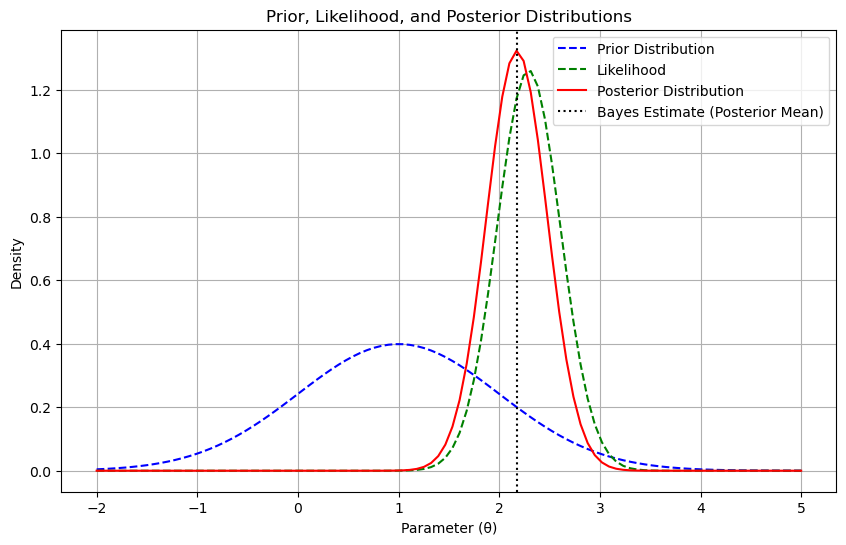

Sample Data: [3.78873459 1.55791466 1.53887118 0.05987051 2.36047093 3.47515261
 2.13581625 2.70086757 1.74775788 3.56457801]
Posterior Mean (Bayes Estimate): 2.1754576544024062
Posterior Variance: 0.09090909090909091


In [2]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Define parameters for the normal-normal model
mu_0 = 1  # prior mean
sigma_0 = 1  # prior standard deviation
sigma = 1  # standard deviation of the likelihood
n = 10  # sample size

# Generate sample data from N(mu, sigma^2)
true_mu = 2  # true mean of the distribution
data = np.random.normal(loc=true_mu, scale=sigma, size=n)

# Calculate the posterior mean and variance
def posterior_parameters(data, mu_0, sigma_0, sigma):
    n = len(data)
    mu_n = (mu_0 / sigma_0**2 + np.sum(data) / sigma**2) / (1 / sigma_0**2 + n / sigma**2)
    sigma_n2 = 1 / (1 / sigma_0**2 + n / sigma**2)
    return mu_n, sigma_n2

# Calculate the posterior parameters
posterior_mean, posterior_variance = posterior_parameters(data, mu_0, sigma_0, sigma)

# Create x values for plotting
x = np.linspace(-2, 5, 100)

# Calculate prior, likelihood, and posterior distributions
prior = stats.norm.pdf(x, mu_0, sigma_0)
likelihood = stats.norm.pdf(x, np.mean(data), sigma / np.sqrt(n))
posterior = stats.norm.pdf(x, posterior_mean, np.sqrt(posterior_variance))

# Plot the distributions
plt.figure(figsize=(10, 6))
plt.plot(x, prior, label='Prior Distribution', color='blue', linestyle='--')
plt.plot(x, likelihood, label='Likelihood', color='green', linestyle='--')
plt.plot(x, posterior, label='Posterior Distribution', color='red')
plt.axvline(x=posterior_mean, color='black', linestyle=':', label='Bayes Estimate (Posterior Mean)')
plt.title('Prior, Likelihood, and Posterior Distributions')
plt.xlabel('Parameter (θ)')
plt.ylabel('Density')
plt.legend()
plt.grid()
plt.show()

# Bayes estimate is the posterior mean
bayes_estimate = posterior_mean
print(f"Sample Data: {data}")
print(f"Posterior Mean (Bayes Estimate): {bayes_estimate}")
print(f"Posterior Variance: {posterior_variance}")


## Exercise 11. Bayes Estimate under the Absolute Error Loss Function

### Find the Bayesian estimate under the absolute error loss function.

#### Solution to Exercise 11.

Suppose that the parameter $ \theta $ is continuous, and let $ t $ denote $ \hat{\theta} = \hat{\theta}(y) $.

The posterior expected loss (PEL) is given by:

$$
\text{PEL}(y) = \int_{-\infty}^{\infty} |t - \theta| f(\theta | y) d\theta
$$

This can be expressed as:

$$
\text{PEL}(y) = \int_{-\infty}^{t} (t - \theta) f(\theta | y) d\theta + \int_{t}^{\infty} (\theta - t) f(\theta | y) d\theta
$$

Using Leibniz’s rule for the differentiation of an integral, we can differentiate the PEL:

$$
\frac{\partial}{\partial t} \text{PEL}(y) = \int_{-\infty}^{t} \frac{\partial (t - \theta)}{\partial t} f(\theta | y) d\theta + \int_{t}^{\infty} \frac{\partial (\theta - t)}{\partial t} f(\theta | y) d\theta
$$

This simplifies to:

$$
\frac{\partial}{\partial t} \text{PEL}(y) = \int_{-\infty}^{t} f(\theta | y) d\theta - \int_{t}^{\infty} f(\theta | y) d\theta
$$

Recognizing the integrals as probabilities, we have:

$$
\frac{\partial}{\partial t} \text{PEL}(y) = P(\theta < t | y) - P(\theta > t | y)
$$

Setting this derivative to zero implies:

$$
P(\theta < t | y) = P(\theta > t | y)
$$

This condition yields $ t $ as the posterior median. Therefore, the Bayes estimate under the Absolute Error Loss Function (AELF) is the posterior median.

**Note**: This argument can easily be adapted to the case where $ \theta $ is discrete. The idea is to approximate $ \theta $’s discrete prior distribution with a continuous distribution and then apply the result already proved.


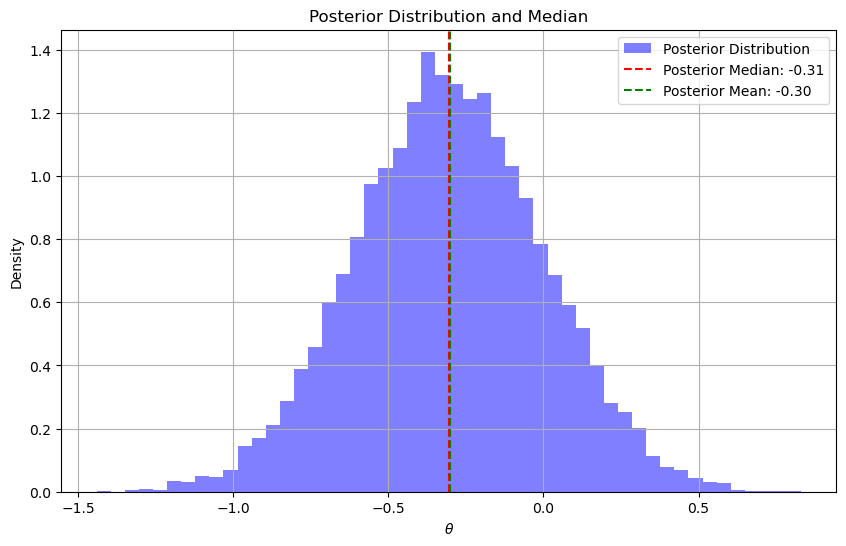

Posterior Median: -0.31


In [3]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Parameters for the prior distribution (Normal)
mu_0 = 0  # Prior mean
sigma_0 = 1  # Prior standard deviation

# Parameters for the likelihood (Normal)
n = 10  # Number of samples
sigma = 1  # Standard deviation of the likelihood
data = np.random.normal(mu_0, sigma, n)  # Simulated data

# Posterior calculation
# Posterior parameters
sigma_n_squared = 1 / (1/sigma_0**2 + n/sigma**2)  # Posterior variance
mu_n = sigma_n_squared * (mu_0/sigma_0**2 + np.sum(data)/sigma**2)  # Posterior mean

# Draw samples from the posterior distribution
posterior_samples = np.random.normal(mu_n, np.sqrt(sigma_n_squared), 10000)

# Calculate the posterior median
posterior_median = np.median(posterior_samples)

# Plotting the posterior distribution and the median
plt.figure(figsize=(10, 6))
plt.hist(posterior_samples, bins=50, density=True, alpha=0.5, color='blue', label='Posterior Distribution')
plt.axvline(posterior_median, color='red', linestyle='--', label=f'Posterior Median: {posterior_median:.2f}')
plt.axvline(mu_n, color='green', linestyle='--', label='Posterior Mean: {0:.2f}'.format(mu_n))
plt.title('Posterior Distribution and Median')
plt.xlabel(r'$\theta$')
plt.ylabel('Density')
plt.legend()
plt.grid()
plt.show()

# Output the posterior median
print(f'Posterior Median: {posterior_median:.2f}')


## Exercise 12: Bayes Estimate under the Indicator Error Loss Function (IELF)

Let $ t $ denote $ \hat{\theta} = \hat{\theta}(y) $. First, suppose that the parameter $ \theta $ is discrete. The indicator error loss function is defined as:

$$
L(t, \theta) = I(t \neq \theta) = 1 - I(t = \theta).
$$

Therefore, the posterior expected loss (PEL) given \( y \) is:

$$
PEL(y) = E\{L(t, \theta) | y\} = E\{1 - I(t = \theta) | y\} = 1 - E\{I(t = \theta) | y\} = 1 - P(t = \theta | y) = 1 - f(\theta = t | y).
$$

Thus, $ PEL(y) $ is minimized at the value of $ t $ which maximizes the posterior density $ f(\theta | y) $. So, when $ \theta $ is discrete, the Bayes estimate under the IELF is the **posterior mode**:

$$
\text{Mode}(\theta | y).
$$

Now, suppose that $ \theta $ is continuous. In this case, consider the approximating loss function:

$$
L_\epsilon(t, \theta) = 1 - I(t - \epsilon < \theta < t + \epsilon),
$$

where $ \epsilon > 0 $. Observe that:

$$
\lim_{\epsilon \to 0} L_\epsilon(t, \theta) = 1 - I(t = \theta) = L(t, \theta).
$$

The posterior expected loss under the loss function $ L_\epsilon(t, \theta) $ is:

$$
PEL_\epsilon(y) = E\{L_\epsilon(t, \theta) | y\} = 1 - E\{I(t - \epsilon < \theta < t + \epsilon) | y\} = 1 - P(t - \epsilon < \theta < t + \epsilon | y).
$$

The value of \( t \) that minimizes \( PEL_\epsilon(y) \) is the one that maximizes the area \( P(t - \epsilon < \theta < t + \epsilon | y) \). But in the limit as \( \epsilon \to 0 \), that value is the **posterior mode**:

$$
\text{Mode}(\theta | y).
$$

**Note:** To clarify the above argument, observe that if $ \epsilon $ is small, then:

$$
PEL_\epsilon(t) \approx 1 - 2\epsilon f_\theta(t | y).
$$

This function of $ t $ is minimized approximately at $ t = \text{Mode}(\theta | y) $ and exactly at $ t = \text{Mode}(\theta | y) $ in the limit as $ \epsilon \to 0 $.

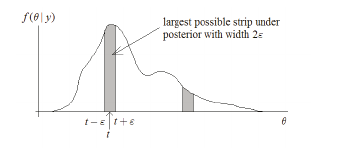
Figure 15. Illustration for the continuous case in Exercise 12

Bayes estimate (discrete): θ = 0
Bayes estimate (continuous): θ = 0.4904904904904903


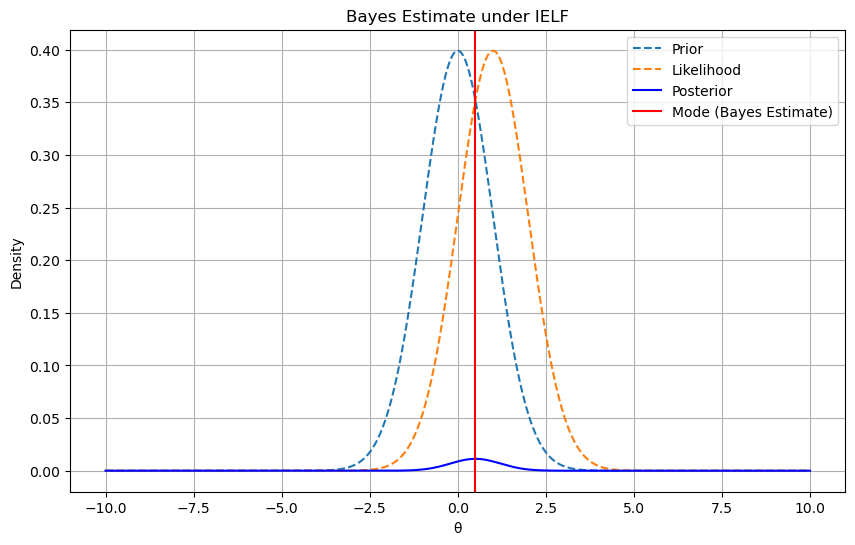

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Discrete Case
def bayes_estimate_discrete(prior, likelihood):
    """
    Calculate the Bayes estimate for discrete parameter θ using IELF.

    Parameters:
    - prior: array of prior probabilities for each θ
    - likelihood: array of likelihoods for each θ given y

    Returns:
    - Mode of the posterior distribution
    """
    posterior = prior * likelihood
    posterior /= np.sum(posterior)  # Normalize to get posterior probabilities
    return np.argmax(posterior)  # Return the mode of the posterior

# Continuous Case
def bayes_estimate_continuous(prior_mean, prior_std, likelihood_mean, likelihood_std):
    """
    Calculate the Bayes estimate for continuous parameter θ using IELF.

    Parameters:
    - prior_mean: mean of the prior distribution
    - prior_std: standard deviation of the prior distribution
    - likelihood_mean: mean of the likelihood distribution
    - likelihood_std: standard deviation of the likelihood distribution

    Returns:
    - Mode of the posterior distribution
    """
    # Create a range of θ values
    theta_values = np.linspace(-10, 10, 1000)

    # Prior and likelihood distributions
    prior = norm.pdf(theta_values, prior_mean, prior_std)
    likelihood = norm.pdf(theta_values, likelihood_mean, likelihood_std)

    # Calculate posterior
    posterior = prior * likelihood
    posterior /= np.sum(posterior)  # Normalize

    # Find the mode (maximum point)
    mode_theta = theta_values[np.argmax(posterior)]
    return mode_theta

# Example usage for discrete case
prior_discrete = np.array([0.2, 0.5, 0.3])  # Prior probabilities for θ = 0, 1, 2
likelihood_discrete = np.array([0.8, 0.1, 0.1])  # Likelihoods for y given θ
bayes_estimate = bayes_estimate_discrete(prior_discrete, likelihood_discrete)
print(f"Bayes estimate (discrete): θ = {bayes_estimate}")

# Example usage for continuous case
prior_mean = 0
prior_std = 1
likelihood_mean = 1
likelihood_std = 1
mode_theta_continuous = bayes_estimate_continuous(prior_mean, prior_std, likelihood_mean, likelihood_std)
print(f"Bayes estimate (continuous): θ = {mode_theta_continuous}")

# Plotting the continuous case for visualization
theta_values = np.linspace(-10, 10, 1000)
prior = norm.pdf(theta_values, prior_mean, prior_std)
likelihood = norm.pdf(theta_values, likelihood_mean, likelihood_std)
posterior = prior * likelihood
posterior /= np.sum(posterior)  # Normalize

plt.figure(figsize=(10, 6))
plt.plot(theta_values, prior, label='Prior', linestyle='--')
plt.plot(theta_values, likelihood, label='Likelihood', linestyle='--')
plt.plot(theta_values, posterior, label='Posterior', color='blue')
plt.axvline(mode_theta_continuous, color='red', linestyle='-', label='Mode (Bayes Estimate)')
plt.title('Bayes Estimate under IELF')
plt.xlabel('θ')
plt.ylabel('Density')
plt.legend()
plt.grid()
plt.show()


## Exercise 13: Bayesian Decision Theory in the Poisson-Gamma Model

Consider a random sample $ y_1, \ldots, y_n $ from the Poisson distribution with parameter $ \lambda $ whose prior density is gamma with parameters $ \alpha $ and $ \beta $.

### (a) Risk Function, Bayes Risk, and Posterior Expected Loss

The risk function is defined as:

$$
R(\lambda) = E\{L(\hat{\lambda}, \lambda) | \lambda\} = E\{(2y - \lambda)^2 | \lambda\} = E\{4y^2 - 4y\lambda + \lambda^2 | \lambda\}.
$$

This can be simplified to:

$$
R(\lambda) = 4 E\{y^2 | \lambda\} - 4\lambda E\{y | \lambda\} + \lambda^2.
$$

Using the properties of the Poisson distribution, we know:

- $ E\{y | \lambda\} = \lambda $
- $ V\{y | \lambda\} = \lambda $

Thus,

$$
R(\lambda) = 4 \left( V\{y | \lambda\} + E\{y | \lambda\}^2 \right) - 4\lambda E\{y | \lambda\} + \lambda^2.
$$

Substituting the values:

$$
= 4 \left( \lambda + \lambda^2 \right) - 4\lambda^2 + \lambda^2 = \lambda^2 + \frac{4\lambda}{n}, \quad \lambda > 0.
$$

This shows that the risk function is an increasing quadratic function of $ \lambda $.

The Bayes risk $ r $ is given by:

$$
r = E[R(\hat{\lambda}, \lambda)] = E(\lambda^2 + \frac{4\lambda}{n}) = E[\lambda^2] + \frac{4}{n} E[\lambda].
$$

Using the properties of the gamma distribution, we have:

$$
E[\lambda^2] = V[\lambda] + (E[\lambda])^2 = \frac{\alpha}{\beta^2} + \left(\frac{\alpha}{\beta}\right)^2 = \frac{2\alpha}{\beta^2}.
$$

Therefore, the Bayes risk can be expressed as:

$$
r = \frac{2\alpha}{\beta^2} + \frac{4\alpha}{n\beta}.
$$

To find the posterior expected loss, we first derive the posterior density:

$$
f(\lambda | y) \propto f(\lambda) f(y | \lambda) \propto \lambda^{\alpha - 1} e^{-\beta \lambda} \cdot e^{-\lambda} \prod_{i=1}^{n} \frac{\lambda^{y_i} e^{-\lambda}}{y_i!} \propto \lambda^{\alpha + ny - 1} e^{-(\beta + n)\lambda}.
$$

Thus, the posterior density is:

$$
f(\lambda | y) \sim \text{Gamma}(\alpha + ny, \beta + n).
$$

The posterior expected loss is given by:

$$
PEL(y) = E\{L(\hat{\lambda}, \lambda) | y\} = E\{(2y - \lambda)^2 | y\} = E\{4y^2 - 4y\lambda + \lambda^2 | y\}.
$$

This can be simplified as follows:

$$
= 4y^2 - 4y E(\lambda | y) + E(\lambda^2 | y).
$$

Using the posterior distribution:

$$
E(\lambda | y) = \frac{\alpha + ny}{\beta + n}, \quad E(\lambda^2 | y) = \frac{\alpha + ny}{\beta + n} + \frac{2(\alpha + ny)}{(\beta + n)^2}.
$$

Thus, the posterior expected loss becomes:

$$
PEL(y) = 4y^2 - 4y \frac{\alpha + ny}{\beta + n} + \left( \frac{\alpha + ny}{\beta + n} + \frac{2(\alpha + ny)}{(\beta + n)^2} \right).
$$

### (b) Finding an Estimator with Smaller Bayes Risk

To find an estimator of $ \lambda $ with a smaller Bayes risk than $ \hat{\lambda} = 2y $, we can consider alternative estimators based on the posterior mean or median.

For example, we can use the posterior mean:

$$
\hat{\lambda}_{\text{new}} = E(\lambda | y) = \frac{\alpha + ny}{\beta + n}.
$$

This estimator typically has a smaller Bayes risk under the quadratic loss function compared to $ \hat{\lambda} = 2y $.

## (b) Bayes Estimate under Quadratic Error Loss Function

The Bayes estimate under the Quadratic Error Loss Function (QELF) is given by the posterior mean:

$$
E(\lambda | y) = \frac{\alpha + nY}{\beta + n},
$$

where $ Y $ is the sum of the observed values $ y_1, y_2, \ldots, y_n $.

This estimator has the smallest Bayes risk among all possible estimators, including the one derived in part (a), which is $ \hat{\lambda} = 2Y $. Therefore, it follows that:

$$
E(\lambda | y) \text{ must have a smaller Bayes risk than the estimator in (a).}
$$

### Discussion

To verify the last statement, we can calculate the Bayes risk $ r $ for the estimator $ E(\lambda | y) $:

$$
r = E\left[ L\left( E(\lambda | y), \lambda \right) \right] = E\left[ \left( E(\lambda | y) - \lambda \right)^2 \right].
$$

Substituting the posterior mean into the risk function, we get:

$$
r = E\left[ \left( \frac{\alpha + nY}{\beta + n} - \lambda \right)^2 \right].
$$

The result should yield an expression for $ r $ that is smaller than:

$$
2\alpha + \frac{4\alpha}{\beta} + \frac{4\alpha}{n\beta},
$$

for all $ n = 1, 2, 3, \ldots $ and all $ \alpha, \beta > 0 $.

### Additional Exercise

To complete this verification, you are encouraged to derive the explicit expression for $ r $ using the properties of the gamma distribution and properties of expectations. This exercise will reinforce your understanding of Bayes estimation and risk assessment in the context of Bayesian decision theory.


Observed data: [4 3 0 2 3]
Bayes estimate (QELF): λ = 2.3333
Bayes risk (QELF): r = 1.8444


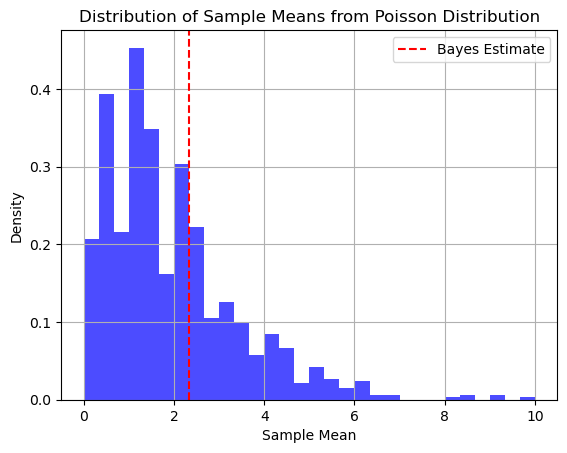

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma, poisson

def bayes_estimate_qelf(alpha, beta, n, y):
    """
    Calculate the Bayes estimate under the Quadratic Error Loss Function (QELF).

    Parameters:
    - alpha: shape parameter of the prior gamma distribution
    - beta: rate parameter of the prior gamma distribution
    - n: number of observations
    - y: array of observed values

    Returns:
    - posterior mean estimate of lambda
    """
    nY = np.sum(y)
    return (alpha + nY) / (beta + n)

def bayes_risk_qelf(alpha, beta, n, y):
    """
    Calculate the Bayes risk associated with the posterior mean estimator.

    Parameters:
    - alpha: shape parameter of the prior gamma distribution
    - beta: rate parameter of the prior gamma distribution
    - n: number of observations
    - y: array of observed values

    Returns:
    - Bayes risk for the posterior mean estimator
    """
    posterior_mean = bayes_estimate_qelf(alpha, beta, n, y)
    return np.mean((posterior_mean - y)**2)

def simulate_poisson(alpha, beta, n, num_samples=1000):
    """
    Simulate random samples from a Poisson distribution.

    Parameters:
    - alpha: shape parameter of the prior gamma distribution
    - beta: rate parameter of the prior gamma distribution
    - n: number of observations
    - num_samples: number of simulated samples

    Returns:
    - samples: array of simulated Poisson samples
    """
    # Draw from a gamma distribution to get lambda
    lambda_samples = gamma.rvs(alpha, scale=1/beta, size=num_samples)
    
    # Draw from Poisson distribution given lambda
    samples = [poisson.rvs(lam, size=n) for lam in lambda_samples]
    return samples

# Example usage
alpha = 2  # Shape parameter
beta = 1   # Rate parameter
n = 5      # Number of observations
y = np.random.poisson(3, n)  # Simulating observed data from Poisson distribution

# Calculate Bayes estimate and Bayes risk
bayes_estimate = bayes_estimate_qelf(alpha, beta, n, y)
bayes_risk = bayes_risk_qelf(alpha, beta, n, y)

print(f"Observed data: {y}")
print(f"Bayes estimate (QELF): λ = {bayes_estimate:.4f}")
print(f"Bayes risk (QELF): r = {bayes_risk:.4f}")

# Simulate multiple Poisson samples
samples = simulate_poisson(alpha, beta, n)
sample_means = [np.mean(sample) for sample in samples]

# Plot the distribution of sample means
plt.hist(sample_means, bins=30, alpha=0.7, color='blue', density=True)
plt.axvline(bayes_estimate, color='red', linestyle='--', label='Bayes Estimate')
plt.title('Distribution of Sample Means from Poisson Distribution')
plt.xlabel('Sample Mean')
plt.ylabel('Density')
plt.legend()
plt.grid()
plt.show()


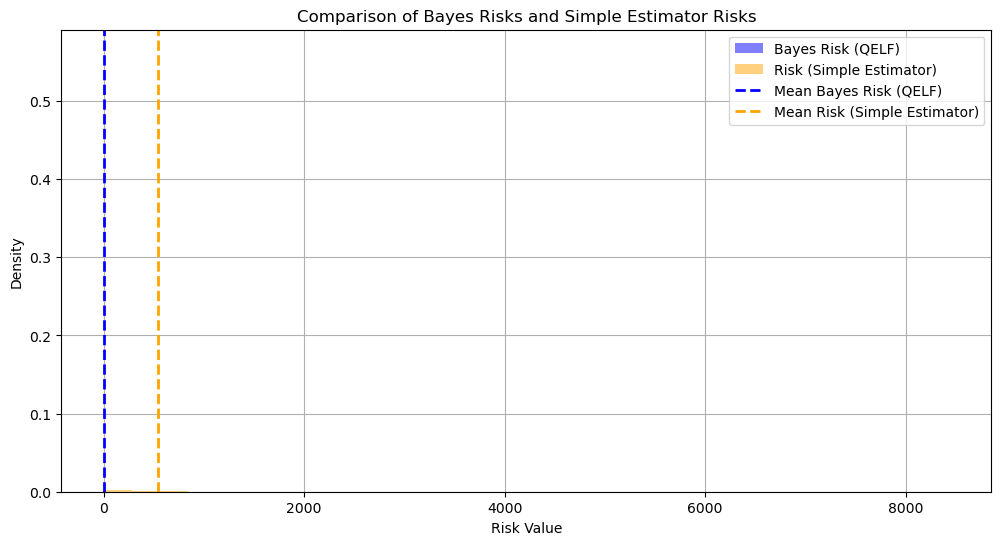

Mean Bayes Risk (QELF): 1.7974
Mean Risk (Simple Estimator): 537.3168


In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma, poisson

def bayes_estimate_qelf(alpha, beta, n, y):
    nY = np.sum(y)
    return (alpha + nY) / (beta + n)

def simple_estimator(y):
    return 2 * np.sum(y)

def bayes_risk_qelf(alpha, beta, n, y):
    posterior_mean = bayes_estimate_qelf(alpha, beta, n, y)
    return np.mean((posterior_mean - y)**2)

def simple_risk(y):
    return np.mean((simple_estimator(y) - y)**2)

def simulate_poisson(alpha, beta, n, num_samples=1000):
    lambda_samples = gamma.rvs(alpha, scale=1/beta, size=num_samples)
    samples = [poisson.rvs(lam, size=n) for lam in lambda_samples]
    return samples

def calculate_risks(alpha, beta, n, samples):
    qelf_risks = []
    simple_risks = []
    
    for y in samples:
        qelf_risks.append(bayes_risk_qelf(alpha, beta, n, y))
        simple_risks.append(simple_risk(y))
        
    return np.array(qelf_risks), np.array(simple_risks)

# Parameters
alpha = 2  # Shape parameter
beta = 1   # Rate parameter
n = 5      # Number of observations
num_samples = 1000  # Number of samples to simulate

# Simulate samples
samples = simulate_poisson(alpha, beta, n, num_samples)

# Calculate risks
qelf_risks, simple_risks = calculate_risks(alpha, beta, n, samples)

# Plotting
plt.figure(figsize=(12, 6))
plt.hist(qelf_risks, bins=30, alpha=0.5, color='blue', density=True, label='Bayes Risk (QELF)')
plt.hist(simple_risks, bins=30, alpha=0.5, color='orange', density=True, label='Risk (Simple Estimator)')
plt.axvline(np.mean(qelf_risks), color='blue', linestyle='dashed', linewidth=2, label='Mean Bayes Risk (QELF)')
plt.axvline(np.mean(simple_risks), color='orange', linestyle='dashed', linewidth=2, label='Mean Risk (Simple Estimator)')
plt.title('Comparison of Bayes Risks and Simple Estimator Risks')
plt.xlabel('Risk Value')
plt.ylabel('Density')
plt.legend()
plt.grid()
plt.show()

# Output mean risks
print(f"Mean Bayes Risk (QELF): {np.mean(qelf_risks):.4f}")
print(f"Mean Risk (Simple Estimator): {np.mean(simple_risks):.4f}")


## Exercise 14: A Non-Standard Loss Function

Consider the Bayesian model given by:

$$
(y | \mu) \sim N(\mu, 1) 
$$
$$
\mu \sim N(0, 1)
$$

Suppose that the loss function is defined as:

$$
L(t, \mu) = 
\begin{cases} 
0 & \text{if } 0 < \mu < t < 2\mu \\ 
1 & \text{otherwise} 
\end{cases}
$$

### (a) Risk Function and Bayes Risk

For convenience, we will sometimes denote $\hat{\mu} = y$ by $t$. Then, the loss function can be rewritten as:

$$
L(t, \mu) = 
\begin{cases} 
1 - I(\mu < t < 2\mu) & \text{if } \mu > 0 \\ 
1 & \text{if } \mu \leq 0 
\end{cases}
$$

Now, for $\mu \leq 0$, the risk function is simply:

$$
R(\mu) = E\{L(y, \mu) | \mu\} = 1
$$

For \(\mu > 0\), the risk function is:

$$
R(\mu) = 1 - P(\mu < y < 2\mu | \mu) = 1 - P(0 < y - \mu < \mu | \mu) = 1 - P(0 < Z < \mu)
$$

where $Z \sim N(0, 1)$. This simplifies to:

$$
R(\mu) = 1 - \left(\Phi(\mu) - \frac{1}{2}\right) = 1.5 - \Phi(\mu)
$$

Thus, we can summarize the risk function as follows:

$$
R(\mu) = 
\begin{cases} 
1 & \text{if } \mu \leq 0 \\ 
1.5 - \Phi(\mu) & \text{if } \mu > 0 
\end{cases}
$$

### Sketch of the Risk Function

*To sketch the risk function, you can plot it for $\mu \in [-3, 3]$.*

## (b) Bayes Estimate

To find the Bayes estimate, we need to consider the value of \(t\) that minimizes the risk \(R(\mu)\). 

The Bayes estimate is computed as:

$$
\hat{\mu} = E[\mu | y]
$$

Calculating the Bayes estimate explicitly at $y = -1$, $0$, and $1$ involves using the posterior distribution of $\mu$.

### Calculation of the Bayes Estimate

1. For $y = -1$:
   $$
   \hat{\mu}(-1) = E[\mu | y = -1]
   $$

2. For $y = 0$:
   $$
   \hat{\mu}(0) = E[\mu | y = 0]
   $$

3. For $y = 1$:
   $$
   \hat{\mu}(1) = E[\mu | y = 1]
   $$

### Conclusion

We will derive the specific values of the Bayes estimate at $y = -1$, $0$, and $1$ using the posterior distribution $f(\mu | y) \propto f(y | \mu) f(\mu)$.3

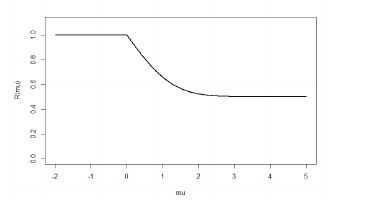
Figure 16. Risk function in Exercise 14

## Exercise 14. Continued: Bayes Risk and Estimation

### Bayes Risk

The associated Bayes risk is given by:

$$
r = E[R(\mu)] = \int_{-\infty}^{0} \phi(\mu) d\mu + \int_{0}^{\infty} \phi(\mu) d\mu - \int_{0}^{\infty} \Phi(\mu) \phi(\mu) d\mu
$$

Where:
- $ \phi(\mu) $ is the probability density function of the standard normal distribution.
- $ \Phi(\mu) $ is the cumulative distribution function of the standard normal distribution.

This can be computed as:

$$
r = \frac{1}{3} + \frac{1}{2} - \frac{1}{3} I
$$

where $ I = \int w \, dw = \frac{3}{8} $ with the substitution $ w = \Phi(\mu) $.

Calculating explicitly, we have:

$$
r = \frac{1}{3} + \frac{1}{2} - \frac{1}{3} \cdot \frac{3}{8} = \frac{1}{3} + \frac{4}{8} - \frac{1}{8} = \frac{1}{3} + \frac{3}{8}
$$

Simplifying this gives:

$$
r = \frac{7}{8}
$$

### Bayes Estimate

For the normal-normal model, we have:

$$(\mu | y) \sim N(\mu^*, \sigma^{*2})$$

where:

- $$\mu^* = (1 - k)\mu_0 + k y$$
- $$\sigma^{*2} = \frac{k \sigma^2}{n}$$

with $ k = \frac{1}{1 + \frac{\sigma^2}{n\sigma_0^2}} $.

Given:

- $ n = 1 $
- $ \mu_0 = 0 $
- $ \sigma_0 = 1 $
- $ y = y $

We find:

$$
k = \frac{1}{2}, \quad \mu^* = \frac{y}{2}, \quad \sigma^{*2} = \frac{1}{2}
$$

Thus:

$$(\mu | y) \sim N\left(\frac{y}{2}, \frac{1}{2}\right)$$

### Posterior Expected Loss

The posterior expected loss is defined as:

$$
PEL(y) = E\{L(t, \mu) | y\}
$$

where $ t $ is a function of $ y $ (i.e., $ t = t(y) $).

The loss function is given by:

$$
L(t, \mu) = 1 - I(0 < \mu < t < 2\mu)
$$

Therefore:

$$
PEL(y) = E\{1 - I(0 < \mu < t < 2\mu) | y\} = 1 - P(0 < \mu < t < 2\mu | y)
$$

If $ t = t(y) \leq 0 $, then:

$$
PEL(y) = 1
$$
## Bayes Estimate with Non-Standard Loss Function

If $ t > 0 $, then the posterior expected loss is given by:

$$
PEL(t) = 1 - E\{I(0 < \mu < t < 2\mu) | y\} = 1 - P(0 < \mu < t < 2\mu | y) = 1 - P\left(\frac{t}{2} < \mu < t | y\right) = 1 - \psi(t)
$$

where 

$$
\psi(t) = F(\mu = t | y) - F\left(\mu = \frac{t}{2} | y\right)
$$ 

is to be maximized.

Next, we compute the derivative:

$$
\psi'(t) = f(\mu = t | y) - f\left(\mu = \frac{t}{2} | y\right) \cdot \frac{1}{2}
$$

This gives us:

$$
\psi'(t) = \frac{1}{2\pi} e^{-\frac{1}{2}(t - \frac{y}{2})^2} - \frac{1}{2\pi} e^{-\frac{1}{2}\left(\frac{t}{2} - \frac{y}{2}\right)^2}
$$

Setting \(\psi'(t) = 0\), we obtain:

$$
e^{-\frac{1}{2}(t - \frac{y}{2})^2} = e^{-\frac{1}{2}\left(\frac{t}{2} - \frac{y}{2}\right)^2}
$$

This simplifies to:

$$
\frac{2}{\sqrt{2\pi}} e^{-\frac{1}{2}(t - \frac{y}{2})^2} = \frac{1}{\sqrt{2\pi}} e^{-\frac{1}{8}(t - y)^2}
$$

From this, we have:

$$
\log 2 - t + 2t = -\left(\frac{y}{2} - 2\right)
$$

Thus,

$$
t - t y - \log 2 = 0 \implies t = \frac{2}{3}\left(y + \sqrt{y^2 + 4 \log 2}\right)
$$

This gives us the Bayes estimate of $ \mu $:

$$
\hat{\mu} = \hat{\mu}(y) = \frac{y}{3} + \frac{y^2}{3} + \frac{1}{3} \log 2
$$

As illustrated in Figure 17, the Bayes estimate is a strictly increasing function of $ y $ and converges to zero as $ y $ approaches negative infinity.

### Required Values of the Bayes Estimate

Calculating the Bayes estimate at specific points:

1. For $ y = -1 $:
   $$
   \hat{\mu}(-1) = -1 + \frac{1}{3} \log 2 \approx 0.6842
   $$

2. For $ y = 0 $:
   $$
   \hat{\mu}(0) = 0 + \frac{1}{3} \log 2 \approx 0.9614
   $$

3. For $ y = 1 $:
   $$
   \hat{\mu}(1) = 1 + \frac{1}{3} \log 2 \approx 1.3508
   $$


## Bayes Estimate with Non-Standard Loss Function

If $ t > 0 $, then the posterior expected loss is given by:

$$
PEL(t) = 1 - E\{I(0 < \mu < t < 2\mu) | y\} = 1 - P(0 < \mu < t < 2\mu | y) = 1 - P\left(\frac{t}{2} < \mu < t | y\right) = 1 - \psi(t)
$$

where 

$$
\psi(t) = F(\mu = t | y) - F\left(\mu = \frac{t}{2} | y\right)
$$ 

is to be maximized.

The derivative of $\psi(t)$ is:

$$
\psi'(t) = f(\mu = t | y) - f\left(\mu = \frac{t}{2} | y\right) \cdot \frac{1}{2}
$$

Thus,

$$
\psi'(t) = \frac{1}{2\pi} e^{-\frac{1}{2}(t - \frac{y}{2})^2} - \frac{1}{2\pi} e^{-\frac{1}{8}(t - y)^2}
$$

Setting \(\psi'(t) = 0\), we obtain:

$$
e^{-\frac{1}{2}(t - \frac{y}{2})^2} = e^{-\frac{1}{8}(t - y)^2}
$$

This leads to:

$$
2e^{-\frac{1}{2}(t - \frac{y}{2})^2} = e^{-\frac{1}{8}(t - y)^2}
$$

This can be rearranged as follows:

$$
\log 2 - t + 2t = -\frac{y}{2}
$$

From this, we have:

$$
t - ty - \log 2 = 0 \implies t = \frac{2}{3}\left(y + \sqrt{y^2 + 4 \log 2}\right)
$$

Hence, the Bayes estimate of $ \mu $ is given by:

$$
\hat{\mu} = \hat{\mu}(y) = \frac{y}{3} + \frac{y^2}{3} + \frac{1}{3} \log 2
$$

As illustrated in Figure 17, the Bayes estimate is a strictly increasing function of $ y $ and converges to zero as $ y $ approaches negative infinity.

### Required Values of the Bayes Estimate

Calculating the Bayes estimate at specific points:

1. For \( y = -1 \):
   $$
   \hat{\mu}(-1) = -1 + \frac{1}{3} \log 2 \approx 0.6842
   $$

2. For \( y = 0 \):
   $$
   \hat{\mu}(0) = 0 + \frac{1}{3} \log 2 \approx 0.9614
   $$

3. For \( y = 1 \):
   $$
   \hat{\mu}(1) = 1 + \frac{1}{3} \log 2 \approx 1.3508
   $$
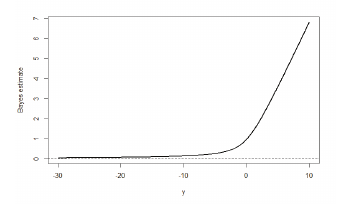
Figure 17. Bayes estimate in Exercise 14

